### keywords




### Target: Transported

(dar formato a las palabras clave de las columnas con HTML)

File and Data Field Descriptions
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

#### Libraries used to the project

In [72]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import pygwalker as pyg
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
from bokeh.io import output_notebook

output_notebook()


C:\Users\psych\AppData\Local\Temp\ipykernel_16992\2778613854.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Loading BokehJS ...

### Import .csv example train

In [73]:
df = pd.read_csv('train.csv')
df.head(4)
#walker = pyg.walk(df, spec="config.json", use_preview=True, use_kernel_calc=True)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [75]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [76]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

c:\Users\psych\OneDrive\Escritorio\IAF5\proyectos\proyecto_ST\ST\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


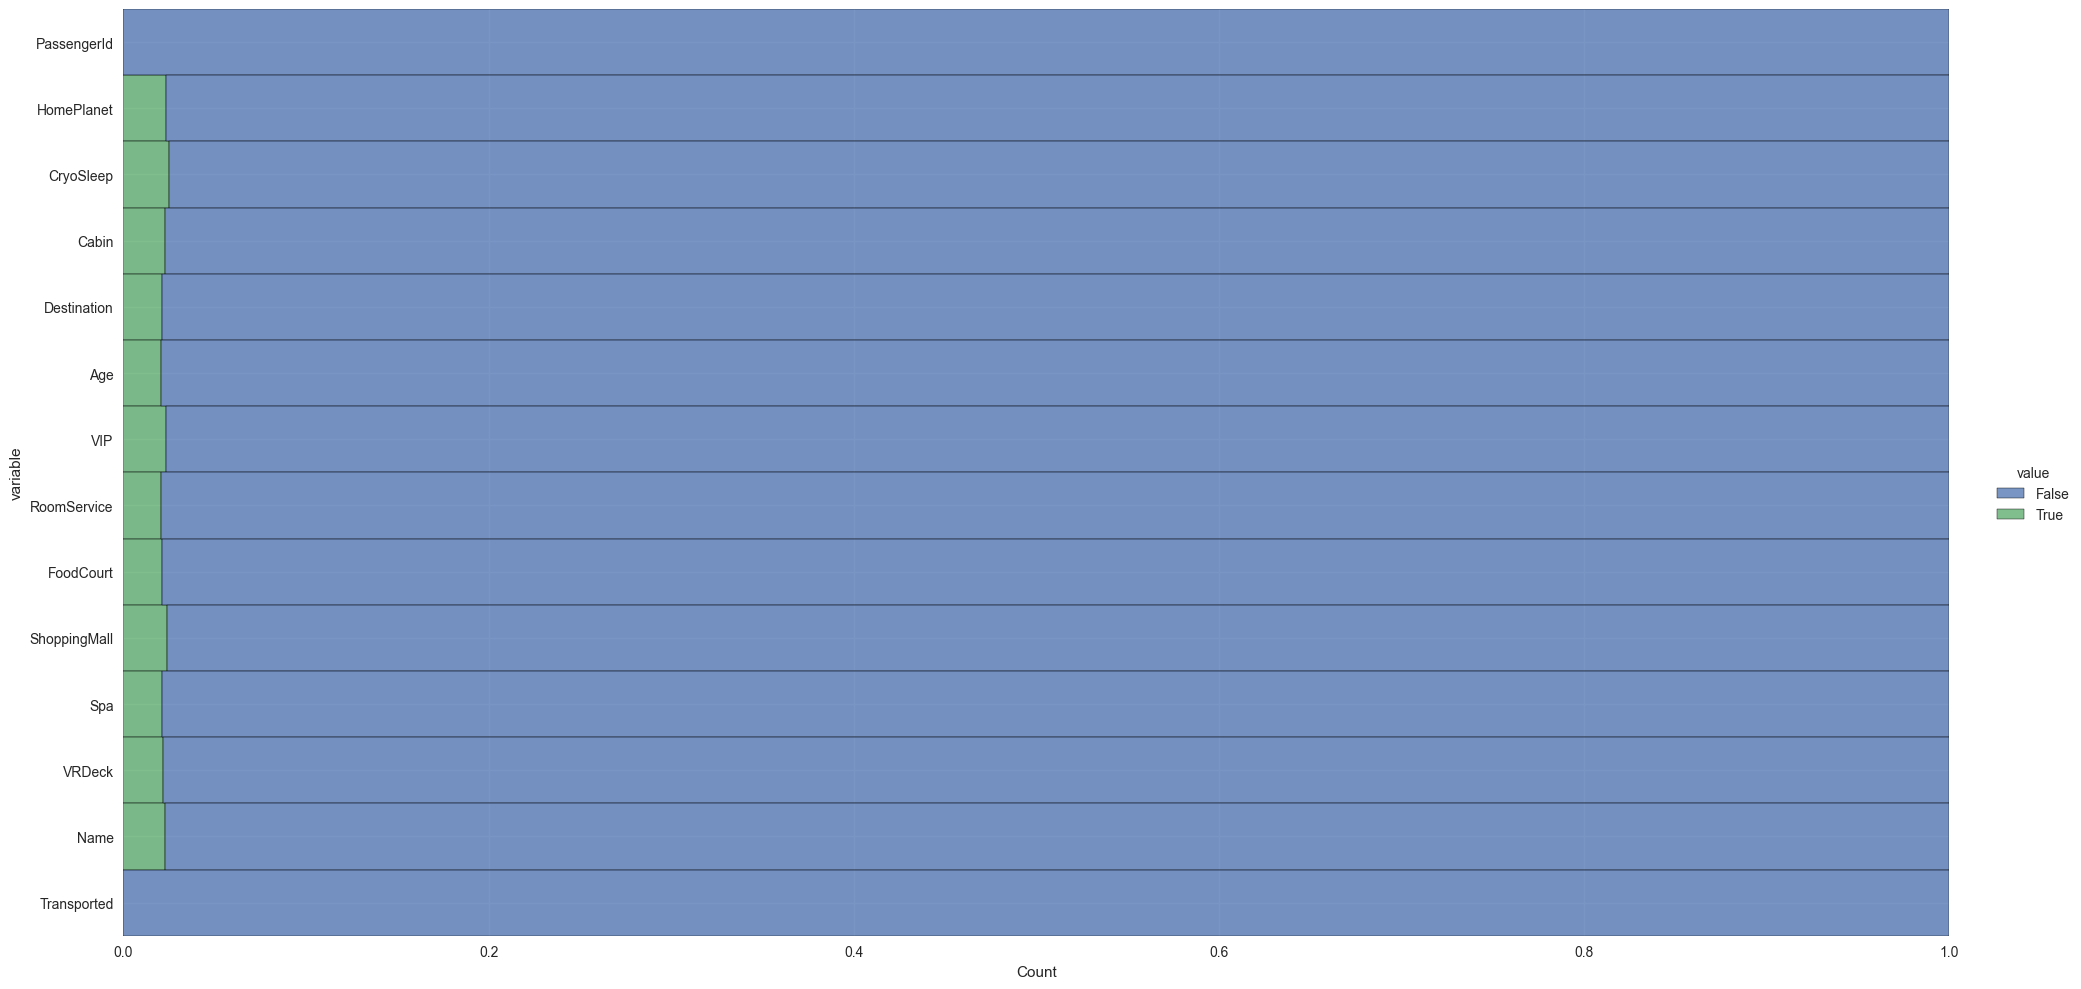

In [77]:
df.isnull().melt().pipe(lambda df:(sns.displot(data=df, y="variable", hue="value", multiple="fill", height=10, aspect=2)))

In [78]:
np.round(100*df.isna().sum()/len(df), 2)

PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64

In [ ]:
### Graphic: Cryosleep, VIP, Homeplanet, Destination

In [79]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('VIP', 'CryoSleep', 'Unicorn'))
L= len(df)

cnames = list(df.columns)
for k, name in enumerate(cnames):
    n_true = df[name].sum()
    fig.add_trace(go.Bar(x=['True', 'False'], y=[n_true, L-n_true], name=name ), 1,k+1)
fig.update_layout(barmode='relative',  bargap=0.05, width=700, height=400)

NameError: name 'make_subplots' is not defined